<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import misc
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import display, HTML

# Read in the Data

In [3]:
df = pd.read_csv('https://github.com/sstangl/openpowerlifting-static/raw/gh-pages/openpowerlifting.csv.bz2')

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Print the Various Attributes

In [4]:
print(df.columns)

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
       'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg',
       'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg',
       'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks',
       'McCulloch', 'Tested', 'AgeClass', 'Country', 'Glossbrenner',
       'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'],
      dtype='object')


# Raw Tested Data

In [5]:
raw_tested = df[(df['Tested']=='Yes') & (df['Equipment']=='Raw')]

In [6]:
display(raw_tested.head())

,Name,Sex,Event,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,McCulloch,Tested,AgeClass,Country,Glossbrenner,Federation,Date,MeetCountry,MeetState,MeetName
787,Becca Dison,F,SBD,Raw,19.0,Open,55.91,56,120.0,-125.0,...,419.64,Yes,18-19,USA,356.92,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
788,Andrea Fox,F,SBD,Raw,35.0,Open,67.22,67.5,102.5,-112.5,...,322.46,Yes,35-39,NaN,284.47,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
789,Candace Locklear,F,SBD,Raw,23.0,Open,74.66,75,137.5,145.0,...,378.96,Yes,24-34,NaN,333.41,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
791,Tara Peele,F,SBD,Raw,41.0,M1-Mst,73.66,75,102.5,110.0,...,310.78,Yes,40-44,USA,270.85,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution
792,Kathryn French,F,D,Raw,26.0,Open,83.82,90,NaN,NaN,...,145.06,Yes,24-34,NaN,126.84,365Strong,2018-03-10,USA,NC,Enterprise Power Revolution


In [7]:
raw_tested_male = raw_tested[raw_tested['Sex']=='M']

Compare the bench press, squat, and deadlift of raw tested males.

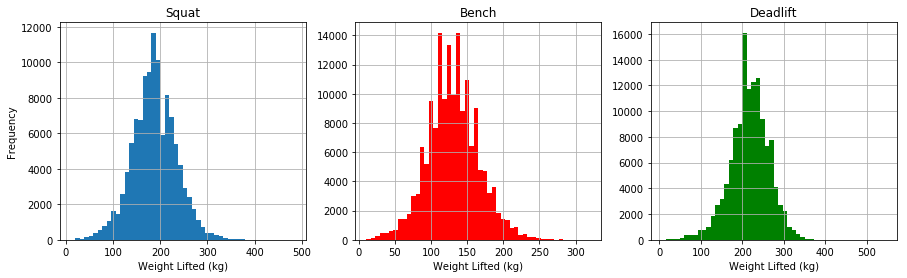

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].hist(raw_tested_male['Best3SquatKg'][raw_tested_male['Best3SquatKg']>0], bins=50)
ax[1].hist(raw_tested_male['Best3BenchKg'][raw_tested_male['Best3BenchKg']>0], bins=50, color='r')
ax[2].hist(raw_tested_male['Best3DeadliftKg'][raw_tested_male['Best3DeadliftKg']>0], bins=50, color='g')

ax[0].grid()
ax[1].grid()
ax[2].grid()

ax[0].set_title('Squat')
ax[1].set_title('Bench')
ax[2].set_title('Deadlift')

ax[0].set_xlabel('Weight Lifted (kg)')
ax[1].set_xlabel('Weight Lifted (kg)')
ax[2].set_xlabel('Weight Lifted (kg)')

ax[0].set_ylabel('Frequency')

plt.show()

# Total Lifts as a Function of Weight

Only take data when lifter completed all three lifts.

In [9]:
raw_tested_male_all3 = raw_tested_male[(raw_tested_male['Best3SquatKg']>0) &
                                       (raw_tested_male['Best3BenchKg']>0) &
                                       (raw_tested_male['Best3DeadliftKg']>0) &
                                      (raw_tested_male['BodyweightKg']>50)]

raw_tested_male_all3 = raw_tested_male_all3.dropna(subset=['BodyweightKg', 'TotalKg'])

Plot preliminary data.

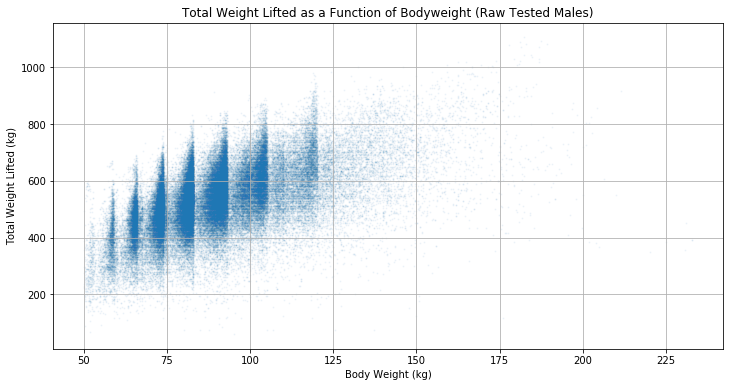

In [10]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.grid()

plt.show()

## Do Some Curve Fitting

In [11]:
bw = np.array(raw_tested_male_all3['BodyweightKg'])
lw = np.array(raw_tested_male_all3['TotalKg'])

In [12]:
def func(x, a, b):
    return a+b*x

popt, pcov = curve_fit(func, np.log(bw), lw)
a_log, b_log = popt[0], popt[1]

popt, pcov = curve_fit(func, bw, lw)
a_lin, b_lin = popt[0], popt[1]

In [13]:
x = np.linspace(50, 200, 1000)

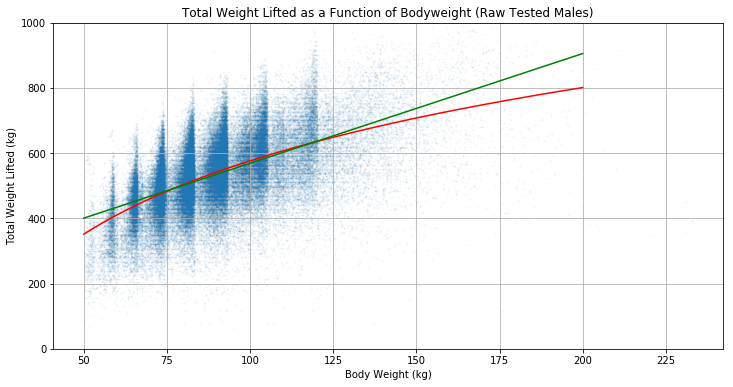

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1)
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')
ax.plot(x, a_log+b_log*np.log(x), color='r')
ax.plot(x, a_lin+b_lin*x, color='g')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.set_ylim(0, 1000)
ax.grid()

plt.show()

## Proposed Solution to Wilks 

Treat the scoring system like IQ. 100 is the mean, 15 is standard deviation. First find the standard deviation (relaitve to our proposed log curve).

In [15]:
S = sum((lwi - (a_log+b_log*np.log(bwi)))**2 for (bwi, lwi) in zip(bw, lw))
std_dev = np.sqrt( S/(len(bw)+1))

Plots:

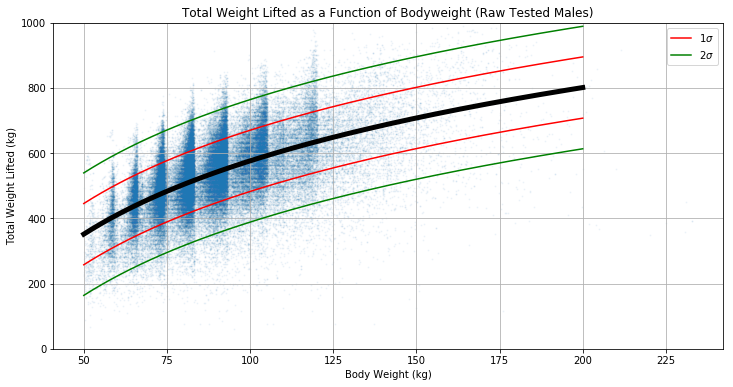

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

ax.scatter(raw_tested_male_all3['BodyweightKg'], raw_tested_male_all3['TotalKg'], alpha=0.05, s=1, label='')
ax.set_ylabel('Total Weight Lifted (kg)')
ax.set_xlabel('Body Weight (kg)')
ax.plot(x, a_log+b_log*np.log(x), color='k', lw=5)
ax.plot(x, std_dev+a_log+b_log*np.log(x), color='r', label='$1\sigma$')
ax.plot(x, -std_dev+a_log+b_log*np.log(x), color='r')
ax.plot(x, 2*std_dev+a_log+b_log*np.log(x), color='g', label='$2\sigma$')
ax.plot(x, -2*std_dev+a_log+b_log*np.log(x), color='g')

ax.legend(loc='best')

ax.set_title('Total Weight Lifted as a Function of Bodyweight (Raw Tested Males)')
ax.set_ylim(0, 1000)
ax.grid()

plt.show()

In [47]:
df1 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']<59)]
df2 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>59) & (raw_tested_male_all3['BodyweightKg']<66)]
df3 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>66) & (raw_tested_male_all3['BodyweightKg']<74)]
df4 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>74) & (raw_tested_male_all3['BodyweightKg']<83)]
df5 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>83) & (raw_tested_male_all3['BodyweightKg']<93)]
df6 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>93) & (raw_tested_male_all3['BodyweightKg']<105)]
df7 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>105) & (raw_tested_male_all3['BodyweightKg']<120)]
df8 = raw_tested_male_all3[(raw_tested_male_all3['BodyweightKg']>120)]

dfs = [(df1, 59), (df2, 66), (df3, 74), (df4, 83), (df5, 93), (df6, 105), (df7, 120), (df8, 150)]

C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
No handles with labels found to put in legend.
C:\Users\lukep\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes

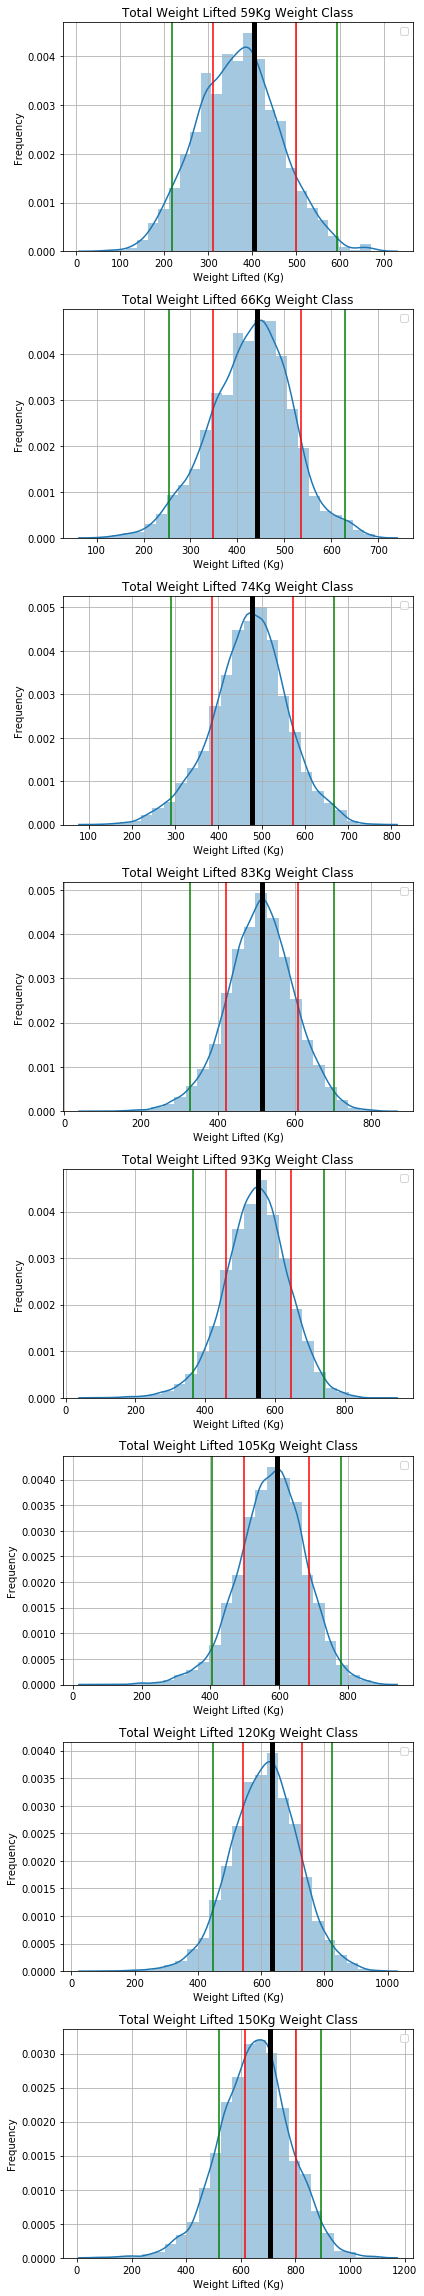

In [48]:
fig, ax = plt.subplots(8,1,figsize=(6,32))

for (i, df) in enumerate(dfs):
    
    sns.distplot(df[0]['TotalKg'], bins=25, ax=ax[i])

    ax[i].set_xlabel('Weight Lifted (Kg)')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title('Total Weight Lifted {}Kg Weight Class'.format(df[1]))

    ax[i].axvline(a_log+b_log*np.log(df[1]), color='k', lw=5)
    ax[i].axvline(std_dev+a_log+b_log*np.log(df[1]), color='r')
    ax[i].axvline(-std_dev+a_log+b_log*np.log(df[1]), color='r')
    ax[i].axvline(2*std_dev+a_log+b_log*np.log(df[1]), color='g')
    ax[i].axvline(-2*std_dev+a_log+b_log*np.log(df[1]), color='g')

    ax[i].legend()
    ax[i].grid()


fig.tight_layout()
plt.show()